# Pneumonia Identification from X-rays

Data available at https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?datasetId=17810

#### Import the necessary Libraries 

In [1]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [3]:
tf.test.is_gpu_available

<function tensorflow.python.framework.test_util.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)>

In [4]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [5]:
#from tensorflow.python.client import device_lib 
#print(device_lib.list_local_devices())

##### Print all data directories 

In [6]:
for dirname, _, filenames in os.walk('chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

chest_xray/.DS_Store
chest_xray/test/.DS_Store
chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg
chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg
chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg
chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg
chest_xray/test/PNEUMONIA/person1647_virus_2848.jpeg
chest_xray/test/PNEUMONIA/person1675_virus_2891.jpeg
chest_xray/test/PNEUMONIA/person89_bacteria_440.jpeg
chest_xray/test/PNEUMONIA/person35_virus_80.jpeg
chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg
chest_xray/test/PNEUMONIA/person119_bacteria_565.jpeg
chest_xray/test/PNEUMONIA/person1662_virus_2875.jpeg
chest_xray/test/PNEUMONIA/person85_bacteria_422.jpeg
chest_xray/test/PNEUMONIA/person1669_virus_2884.jpeg
chest_xray/test/PNEUMONIA/person39_virus_85.jpeg
chest_xray/test/PNEUMONIA/person36_virus_81.jpeg
chest_xray/test/PNEUMONIA/person134_bacteria_640.jpeg
chest_xray/test/PNEUMONIA/person138_bacteria_659.jpeg
chest_xray/test/PNEUMONIA/person92_bacteria_450.jpeg
ches

chest_xray/train/PNEUMONIA/person1746_bacteria_4585.jpeg
chest_xray/train/PNEUMONIA/person64_bacteria_320.jpeg
chest_xray/train/PNEUMONIA/person22_bacteria_74.jpeg
chest_xray/train/PNEUMONIA/person586_bacteria_2420.jpeg
chest_xray/train/PNEUMONIA/person537_bacteria_2262.jpeg
chest_xray/train/PNEUMONIA/person1497_virus_2607.jpeg
chest_xray/train/PNEUMONIA/person622_bacteria_2494.jpeg
chest_xray/train/PNEUMONIA/person530_bacteria_2231.jpeg
chest_xray/train/PNEUMONIA/person7_bacteria_29.jpeg
chest_xray/train/PNEUMONIA/person684_virus_1275.jpeg
chest_xray/train/PNEUMONIA/person326_bacteria_1507.jpeg
chest_xray/train/PNEUMONIA/person260_virus_541.jpeg
chest_xray/train/PNEUMONIA/person370_bacteria_1690.jpeg
chest_xray/train/PNEUMONIA/person1142_virus_1892.jpeg
chest_xray/train/PNEUMONIA/person1545_bacteria_4041.jpeg
chest_xray/train/PNEUMONIA/person81_virus_152.jpeg
chest_xray/train/PNEUMONIA/person1194_bacteria_3143.jpeg
chest_xray/train/PNEUMONIA/person1465_virus_2537.jpeg
chest_xray/train

chest_xray/train/PNEUMONIA/person388_virus_775.jpeg
chest_xray/train/PNEUMONIA/person661_virus_1245.jpeg
chest_xray/train/PNEUMONIA/person1556_bacteria_4062.jpeg
chest_xray/train/PNEUMONIA/person288_virus_587.jpeg
chest_xray/train/PNEUMONIA/person449_bacteria_1939.jpeg
chest_xray/train/PNEUMONIA/person559_bacteria_2329.jpeg
chest_xray/train/PNEUMONIA/person1038_bacteria_2972.jpeg
chest_xray/train/PNEUMONIA/person608_virus_1175.jpeg
chest_xray/train/PNEUMONIA/person1300_virus_2240.jpeg
chest_xray/train/PNEUMONIA/person61_bacteria_288.jpeg
chest_xray/train/PNEUMONIA/person596_bacteria_2443.jpeg
chest_xray/train/PNEUMONIA/person1179_bacteria_3127.jpeg
chest_xray/train/PNEUMONIA/person1445_bacteria_3734.jpeg
chest_xray/train/PNEUMONIA/person549_bacteria_2305.jpeg
chest_xray/train/PNEUMONIA/person1518_bacteria_3969.jpeg
chest_xray/train/PNEUMONIA/person796_bacteria_2702.jpeg
chest_xray/train/PNEUMONIA/person12_bacteria_47.jpeg
chest_xray/train/PNEUMONIA/person1411_bacteria_3602.jpeg
chest_x

In [7]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 256
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

### Loading the data 

In [8]:
train = get_training_data('chest_xray/train')
test = get_training_data('chest_xray/test')
val = get_training_data('chest_xray/val')

/opt/anaconda3/envs/deep-learning-project/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [9]:
### Data Visualization & Preprocessing 

/opt/anaconda3/envs/deep-learning-project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


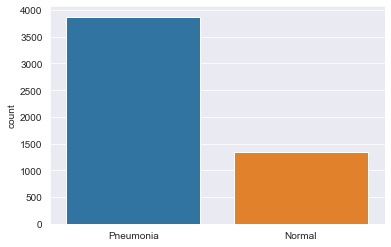

In [10]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)  

The data are  imbalanced . We will use data augmentation in order to overcome the problem 

Text(0.5, 1.0, 'NORMAL')

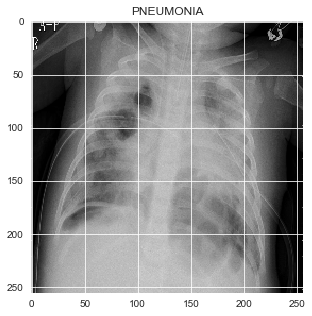

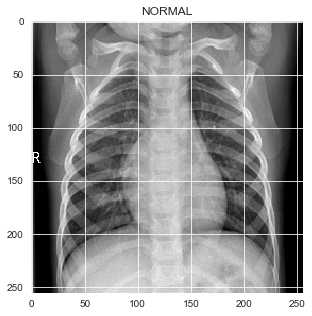

In [11]:
# Check some photos 

plt.figure(figsize = (5,5))
plt.imshow(train[10][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [12]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [13]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

##### Data Augmentation 



In [14]:
# With data augmentation we try to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.25,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.25,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train)

In [20]:
# Model Creation    
def CNN():
    model = tf.keras.Sequential([
    
        # first convolutional layer 
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding = 'same', activation='relu', input_shape = [256,256,1]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        
        
        # second convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'), # same padding is equal to zero padding
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # Droupout 
        tf.keras.layers.Dropout(0.2),
 
        # third convolutional layer 
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),        
        
        
        # fourth convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),         
        
        
        # fifth convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),  
        
        
        # sixth convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),  
        
        # 7th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        
        # 8th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 9th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 10th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 11th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 12th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 13th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 14th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 15th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 16th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 17th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 18th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=2),
        
        # 19th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2),
        
        # 20th convolutional layer 
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding = 'same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2),
        
        # Droupout 
        tf.keras.layers.Dropout(0.2),
        
        # fully connected layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2048, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
      ])
    
       # compile the model 
    model.compile(optimizer = tf.keras.optimizers.Adam() , loss = 'binary_crossentropy' , metrics = ['accuracy'])
    
    return model

In [21]:
model = CNN()

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization_40 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_41 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 64)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.2, min_lr=0.00001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 2) ,epochs = 30 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

### Plot the results 

In [ ]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'mo-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'co-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'm-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'c-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")


plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]


print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))



In [ ]:
cm = confusion_matrix(y_test,predictions)

cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

#### Plot some correct results

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(200,200), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

### Plot some incorrect results 

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(200,200), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1